In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.model_selection import KFold, StratifiedKFold
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import ppscore as pps

In [78]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [79]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\TRAIN.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\TEST.csv')
sample = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\sample_submission.csv')

In [80]:
idx = np.copy(test.Index)

In [81]:
train.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [82]:
test.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [83]:
sample.head()

,Index,Rented Bike Count
0,0,886
1,1,761
2,2,524
3,3,294
4,4,241


In [84]:
train.columns = ['Index','Date','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_Day','Rented_Bike_Count']
test.columns = ['Index','Date','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_Day']

In [85]:
train.describe()

,Index,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Rented_Bike_Count
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,11.500000,13.154778,58.164960,1.785708,1421.082480,4.323905,0.590294,0.152645,0.076024,689.143203
std,2030.107879,6.922679,12.997927,20.637447,1.053112,613.169137,14.178857,0.893909,1.165239,0.403487,652.151786
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,1757.750000,5.750000,1.800000,42.000000,1.000000,918.750000,-6.700000,0.000000,0.000000,0.000000,189.750000
50%,3515.500000,11.500000,15.500000,57.000000,1.600000,1665.000000,6.900000,0.020000,0.000000,0.000000,444.000000
75%,5273.250000,17.250000,24.000000,74.000000,2.400000,1996.000000,16.500000,0.950000,0.000000,0.000000,1035.000000
max,7031.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,3556.000000


In [86]:
test.describe()

,Index,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,1728.000000,1728.00000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,863.500000,11.50000,11.776620,58.475694,1.477488,1500.892361,3.056076,0.482905,0.132581,0.071181
std,498.974949,6.92419,5.856291,19.206298,0.924784,583.871138,6.733800,0.751881,0.962979,0.551917
min,0.000000,0.00000,-3.000000,13.000000,0.000000,33.000000,-19.000000,0.000000,0.000000,0.000000
25%,431.750000,5.75000,7.375000,43.000000,0.800000,1015.000000,-0.300000,0.000000,0.000000,0.000000
50%,863.500000,11.50000,11.600000,59.000000,1.300000,1805.000000,3.600000,0.000000,0.000000,0.000000
75%,1295.250000,17.25000,16.500000,74.000000,2.000000,2000.000000,7.400000,0.810000,0.000000,0.000000
max,1727.000000,23.00000,26.600000,97.000000,5.700000,2000.000000,18.100000,2.930000,18.000000,8.800000


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  7032 non-null   int64  
 1   Date                   7032 non-null   object 
 2   Hour                   7032 non-null   int64  
 3   Temperature            7032 non-null   float64
 4   Humidity               7032 non-null   int64  
 5   Wind_speed             7032 non-null   float64
 6   Visibility             7032 non-null   int64  
 7   Dew_point_temperature  7032 non-null   float64
 8   Solar_Radiation        7032 non-null   float64
 9   Rainfall               7032 non-null   float64
 10  Snowfall               7032 non-null   float64
 11  Seasons                7032 non-null   object 
 12  Holiday                7032 non-null   object 
 13  Functioning_Day        7032 non-null   object 
 14  Rented_Bike_Count      7032 non-null   int64  
dtypes: f

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  1728 non-null   int64  
 1   Date                   1728 non-null   object 
 2   Hour                   1728 non-null   int64  
 3   Temperature            1728 non-null   float64
 4   Humidity               1728 non-null   int64  
 5   Wind_speed             1728 non-null   float64
 6   Visibility             1728 non-null   int64  
 7   Dew_point_temperature  1728 non-null   float64
 8   Solar_Radiation        1728 non-null   float64
 9   Rainfall               1728 non-null   float64
 10  Snowfall               1728 non-null   float64
 11  Seasons                1728 non-null   object 
 12  Holiday                1728 non-null   object 
 13  Functioning_Day        1728 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 189.1+ 

#### Target analysis

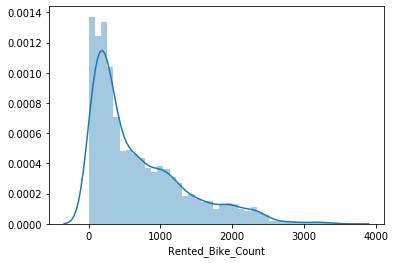

In [89]:
sns.distplot(train.Rented_Bike_Count)

In [90]:
train[train.Rented_Bike_Count==0].shape

(96, 15)

In [91]:
train.Rented_Bike_Count.skew(), train.Rented_Bike_Count.kurt()

(1.2658926650307742, 1.099637910278993)

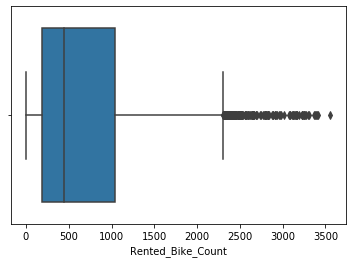

In [92]:
sns.boxplot(train.Rented_Bike_Count)

In [93]:
for i in train[train.Rented_Bike_Count>2083].Seasons.index:
    if (train.loc[i,'Seasons'] != 'Autumn'):
        train.loc[i,'Seasons'] = 'x'
    else:
        pass
    
#train.drop(index = train[train.Rented_Bike_Count>2090].Seasons.index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [94]:
train.drop(index = train[train.Seasons=='x'].index,inplace=True)
train.reset_index(drop=True,inplace=True)

#### Feature analysis

#### Date

In [95]:
train.Date.nunique(),test.Date.nunique()

(293, 72)

In [96]:
train.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Rented_Bike_Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [97]:
test.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


train['agg_temp'] = train.groupby(['Date'])['Temperature'].transform('mean')
#train['agg_humid'] = train.groupby(['Date'])['Humidity'].transform('mean')
#train['agg_wind'] = train.groupby(['Date'])['Wind_speed'].transform('mean')
#train['agg_viz'] = train.groupby(['Date'])['Visibility'].transform('mean')
train['agg_temp_dew'] = train.groupby(['Date'])['Dew_point_temperature'].transform('mean')
train['agg_sol_rd'] = train.groupby(['Date'])['Solar_Radiation'].transform('mean')
#train['agg_rain'] = train.groupby(['Date'])['Rainfall'].transform('mean')
#train['agg_snow'] = train.groupby(['Date'])['Snowfall'].transform('mean')

train['max_temp'] = train.groupby(['Date'])['Temperature'].transform('max')
#train['max_humid'] = train.groupby(['Date'])['Humidity'].transform('max')
#train['max_wind'] = train.groupby(['Date'])['Wind_speed'].transform('max')
#train['max_viz'] = train.groupby(['Date'])['Visibility'].transform('max')
train['max_temp_dew'] = train.groupby(['Date'])['Dew_point_temperature'].transform('max')
train['max_sol_rd'] = train.groupby(['Date'])['Solar_Radiation'].transform('max')
#train['max_rain'] = train.groupby(['Date'])['Rainfall'].transform('max')
#train['max_snow'] = train.groupby(['Date'])['Snowfall'].transform('max')

train['min_temp'] = train.groupby(['Date'])['Temperature'].transform('min')
#train['min_humid'] = train.groupby(['Date'])['Humidity'].transform('min')
#train['min_wind'] = train.groupby(['Date'])['Wind_speed'].transform('min')
#train['min_viz'] = train.groupby(['Date'])['Visibility'].transform('min')
train['min_temp_dew'] = train.groupby(['Date'])['Dew_point_temperature'].transform('min')
train['min_sol_rd'] = train.groupby(['Date'])['Solar_Radiation'].transform('min')
#train['min_rain'] = train.groupby(['Date'])['Rainfall'].transform('min')
#train['min_snow'] = train.groupby(['Date'])['Snowfall'].transform('min')

test['agg_temp'] = test.groupby(['Date'])['Temperature'].transform('mean')
#test['agg_humid'] = test.groupby(['Date'])['Humidity'].transform('mean')
#test['agg_wind'] = test.groupby(['Date'])['Wind_speed'].transform('mean')
#test['agg_viz'] = test.groupby(['Date'])['Visibility'].transform('mean')
test['agg_temp_dew'] = test.groupby(['Date'])['Dew_point_temperature'].transform('mean')
test['agg_sol_rd'] = test.groupby(['Date'])['Solar_Radiation'].transform('mean')
#test['agg_rain'] = test.groupby(['Date'])['Rainfall'].transform('mean')
#test['agg_snow'] = test.groupby(['Date'])['Snowfall'].transform('mean')

test['max_temp'] = test.groupby(['Date'])['Temperature'].transform('max')
#test['max_humid'] = test.groupby(['Date'])['Humidity'].transform('max')
#test['max_wind'] = test.groupby(['Date'])['Wind_speed'].transform('max')
#test['max_viz'] = test.groupby(['Date'])['Visibility'].transform('max')
test['max_temp_dew'] = test.groupby(['Date'])['Dew_point_temperature'].transform('max')
test['max_sol_rd'] = test.groupby(['Date'])['Solar_Radiation'].transform('max')
#test['max_rain'] = test.groupby(['Date'])['Rainfall'].transform('max')
#test['max_snow'] = test.groupby(['Date'])['Snowfall'].transform('max')

test['min_temp'] = test.groupby(['Date'])['Temperature'].transform('mean')
#test['min_humid'] = test.groupby(['Date'])['Humidity'].transform('mean')
#test['min_wind'] = test.groupby(['Date'])['Wind_speed'].transform('mean')
#test['min_viz'] = test.groupby(['Date'])['Visibility'].transform('mean')
test['min_temp_dew'] = test.groupby(['Date'])['Dew_point_temperature'].transform('mean')
test['min_sol_rd'] = test.groupby(['Date'])['Solar_Radiation'].transform('mean')
#test['min_rain'] = test.groupby(['Date'])['Rainfall'].transform('mean')
#test['min_snow'] = test.groupby(['Date'])['Snowfall'].transform('mean')

In [98]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

#### Hour

In [99]:
train.drop(index=4728,inplace=True)
train.reset_index(drop=True,inplace=True)

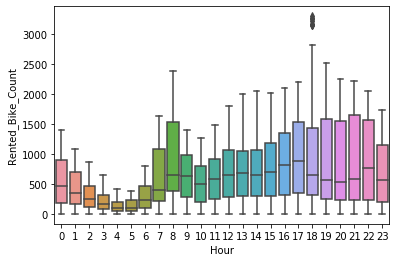

In [100]:
sns.boxplot(train.Hour,train.Rented_Bike_Count)

#### Temperature

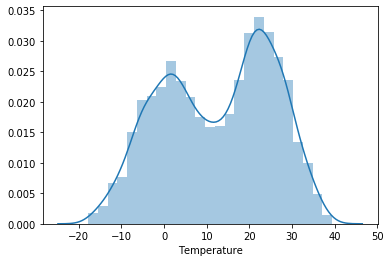

In [101]:
sns.distplot(train.Temperature)

In [102]:
#train.drop(index = train[train.Wind_speed>=5.9].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [103]:
#for i in train[train.Temperature>26.6].index:
#    if(train.loc[i,'Seasons']!='Autumn'):
#        train.loc[i,'Seasons'] = 'x'
#    else:
#        pass
    
#train.drop(index = train[train.Seasons=='x'].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [104]:
train[train.Temperature>26.6].shape

(1073, 15)

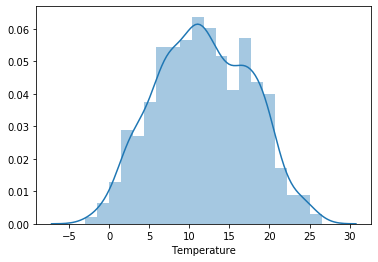

In [105]:
sns.distplot(test.Temperature)

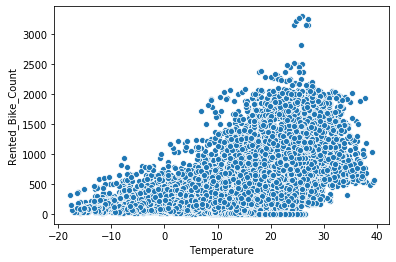

In [106]:
sns.scatterplot(train.Temperature,train.Rented_Bike_Count)

#### Humidity

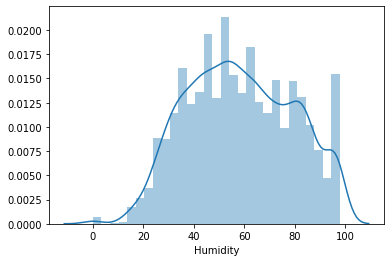

In [107]:
sns.distplot(train.Humidity)

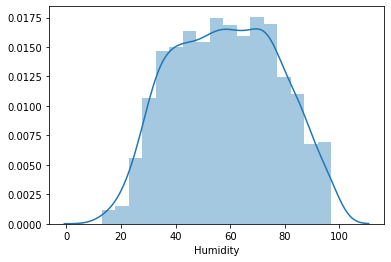

In [108]:
sns.distplot(test.Humidity)

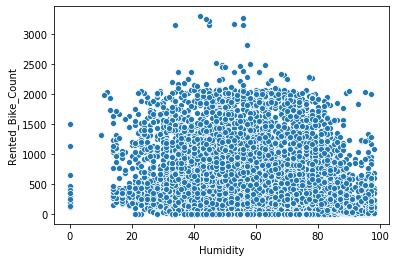

In [109]:
sns.scatterplot(train.Humidity,train.Rented_Bike_Count)

In [110]:
#train.drop(train[train.Humidity==0].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

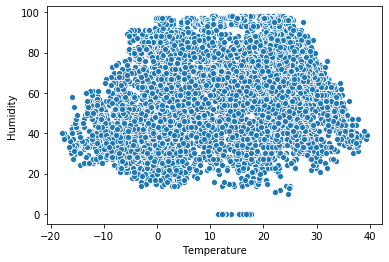

In [111]:
sns.scatterplot(train.Temperature,train.Humidity)

#### Wind Speed

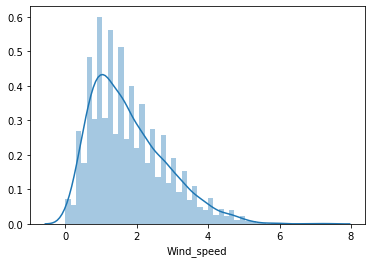

In [112]:
sns.distplot(train.Wind_speed) ##take log1p

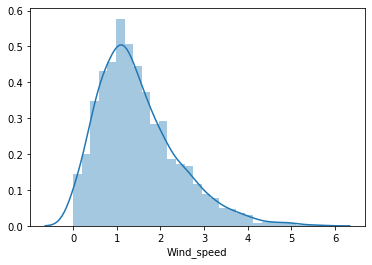

In [113]:
sns.distplot(test.Wind_speed)

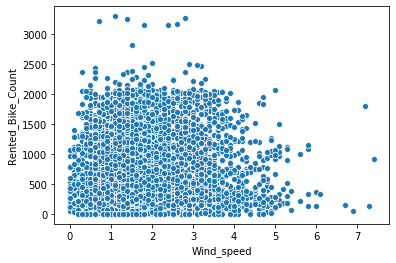

In [114]:
sns.scatterplot(train.Wind_speed,train.Rented_Bike_Count)

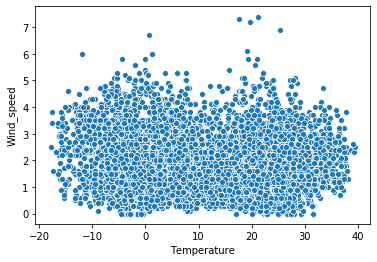

In [115]:
sns.scatterplot(train.Temperature,train.Wind_speed)

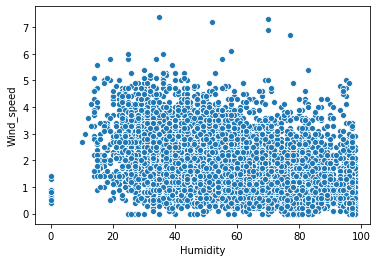

In [116]:
sns.scatterplot(train.Humidity,train.Wind_speed)

#### Visibility

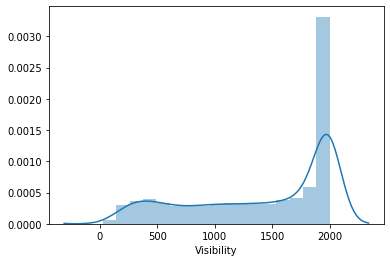

In [117]:
sns.distplot(train.Visibility)

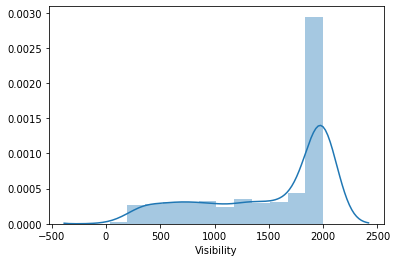

In [118]:
sns.distplot(test.Visibility)

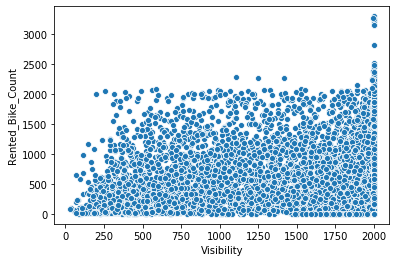

In [119]:
sns.scatterplot(train.Visibility,train.Rented_Bike_Count)

#### Dew point temperature

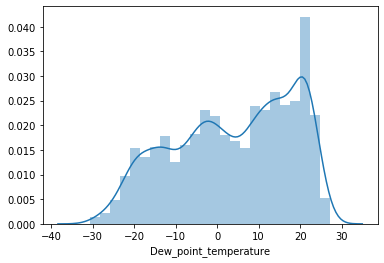

In [120]:
sns.distplot(train.Dew_point_temperature)

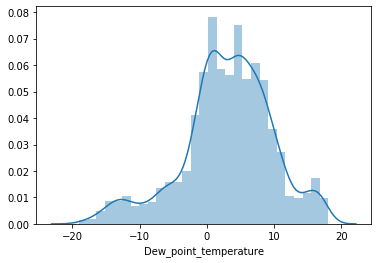

In [121]:
sns.distplot(test.Dew_point_temperature)

for i in train[train.Dew_point_temperature>20].index:
    if(train.loc[i,'Seasons']!='Autumn'):
        train.loc[i,'Seasons'] = 'x'
    else:
        pass
    
train.drop(index = train[train.Seasons=='x'].index,inplace=True)
train.reset_index(drop=True,inplace=True)

In [122]:
train[train.Dew_point_temperature>18].shape

(1479, 15)

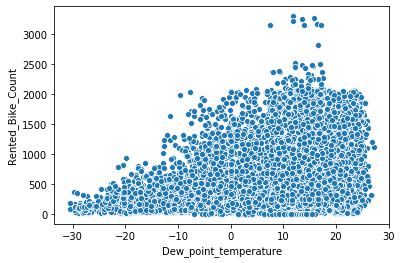

In [123]:
sns.scatterplot(train.Dew_point_temperature,train.Rented_Bike_Count)

#### Solar radiation

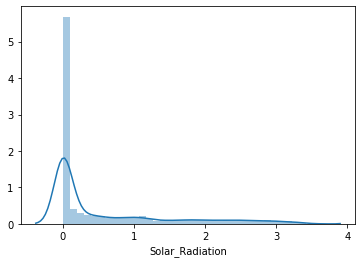

In [124]:
sns.distplot(train.Solar_Radiation)

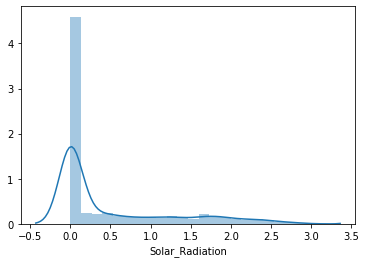

In [125]:
sns.distplot(test.Solar_Radiation)

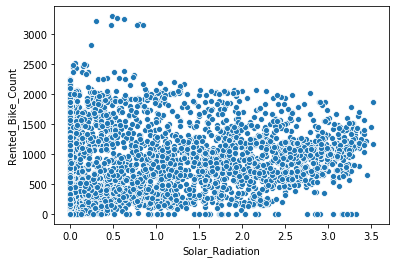

In [126]:
sns.scatterplot(train.Solar_Radiation,train.Rented_Bike_Count)

#### Rainfall

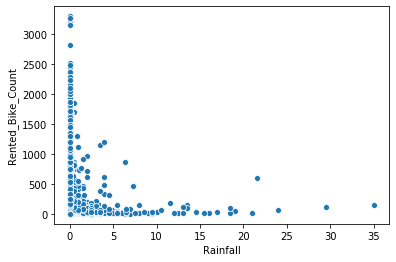

In [127]:
sns.scatterplot(train.Rainfall,train.Rented_Bike_Count)

In [128]:
#train.drop(index = train[train.Rainfall>18].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

#### Snowfall

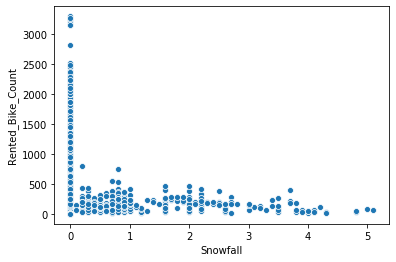

In [129]:
sns.scatterplot(train.Snowfall,train.Rented_Bike_Count)

#### Season

In [130]:
train.Seasons.value_counts()

Winter    2160
Spring    2133
Summer    1980
Autumn     456
Name: Seasons, dtype: int64

In [131]:
test.Seasons.value_counts()

Autumn    1728
Name: Seasons, dtype: int64

#### Holiday

In [132]:
train.Holiday.value_counts()

No Holiday    6421
Holiday        308
Name: Holiday, dtype: int64

In [133]:
test.Holiday.value_counts()

No Holiday    1608
Holiday        120
Name: Holiday, dtype: int64

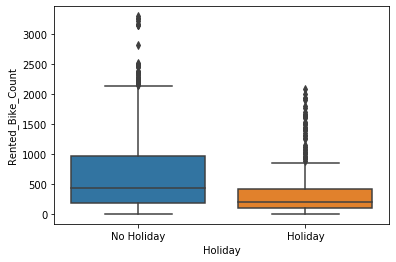

In [134]:
sns.boxplot(train.Holiday,train.Rented_Bike_Count)

for i in train[train.Holiday=='Holiday'].Rented_Bike_Count.index:
    if((train.loc[i,'Seasons']!='Autumn') and (train.loc[i,'Rented_Bike_Count']>=990)):
        train.loc[i,'Seasons'] = 'x'
    else:
        pass
    
train.drop(index = train[train.Seasons=='x'].index,inplace=True)
train.reset_index(drop=True,inplace=True)

#### Functioning day

l=[]
for i in train[train.Rented_Bike_Count>2200].index:
    l.append(i)
    if((train.loc[i,'Seasons']!='Autumn') and (train.loc[i,'Functioning_Day']=='Yes')): 
        train.loc[i,'Seasons'] = 'x' 
    else: 
        pass

train.drop(index = train[train.Seasons=='x'].index,inplace=True)
train.reset_index(drop=True,inplace=True)

In [135]:
train.shape

(6729, 15)

l=list()
c=0
for i in train[train.Functioning_Day=='Yes'].Rented_Bike_Count>2250:
    if(i==True):
        c=c+1
    else:
        pass


In [136]:
train.Functioning_Day.value_counts()

Yes    6633
No       96
Name: Functioning_Day, dtype: int64

In [137]:
test.Functioning_Day.value_counts()

Yes    1529
No      199
Name: Functioning_Day, dtype: int64

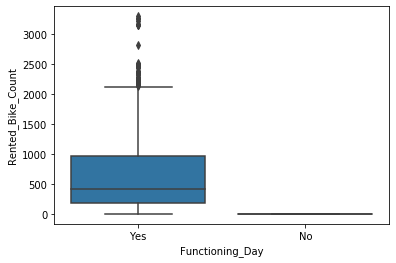

In [138]:
sns.boxplot(train.Functioning_Day,train.Rented_Bike_Count)

### Engineering Features

In [139]:
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)

In [140]:
df.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Rented_Bike_Count
0,0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254.0
1,1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204.0
2,2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173.0
3,3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107.0
4,4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78.0


In [141]:
c1 = -42.379
c2= 2.04901523
c3 = 10.14333127
c4 = -0.22475541
c5 = -6.83783*(10**-3)
c6 = -5.481717*(10**-2)
c7 = 1.22874*(10**-3)
c8 = 8.5282*(10**-4)
c9 = -1.99*(10**-6)

df.Temperature = (df.Temperature*1.8)+32
df.Dew_point_temperature = (df.Dew_point_temperature*1.8)+32

df['HI'] = c1+(c2*df.Temperature) +(c3*df.Humidity)+(c4*df.Temperature*train.Humidity) +(c5*(df.Temperature**2))+(c6*(df.Humidity**2))+(c7*(df.Temperature**2)*df.Humidity)+(c8*train.Temperature*(df.Humidity**2))+(c9*(df.Temperature**2)*(df.Humidity**2))

df['cpa']=1.0189134*(10**3)- (0.3783636*df.Temperature)+(1.9843397*(10**-4)*(df.Temperature**2))+((4.2399242*(10**-7)*(df.Temperature**3)))-((3.7632*(10**-10))*(df.Temperature**4))


In [142]:
df.Wind_speed.nunique()

65

In [143]:
df['month'] = df.Date.dt.month
df['weekday'] = df.Date.dt.weekday
df['week_of_year'] = df.Date.dt.weekofyear
df['day'] = df.Date.dt.day
df['day_of_year']=df.Date.dt.dayofyear
df['quarter'] = df.Date.dt.quarter
#df['day_of_week'] = df.Date.dt.dayofweek

In [144]:
df['Temp_diff'] = abs(df.Temperature) - abs(df.Dew_point_temperature)
df['Total_temp'] = df.Temperature + df.Dew_point_temperature


In [145]:
df['year'] = df.Date.dt.year
df['Index'] = np.arange(0,df.shape[0],1)

In [146]:
df['Dew_Temp_ideal'] = df.Temperature -((100-df.Humidity)/5)
df['Vap_Pres'] = 0.611 * np.exp(5423 *((1/273)-(1/df.Dew_point_temperature)))
df['Sat_Vap_Pres'] = 0.611 * np.exp(5423 *((1/273)-(1/df.Temperature)))
df['calc_rel_humidity'] = df['Vap_Pres']/df['Sat_Vap_Pres']

In [147]:
#df['mon_date'] = str(df.Date.dt.year) + str(df.Date.dt.month)

In [148]:
#df['sin_hour_temp_variation'] = np.sin(2*np.pi*df.Temperature*(df.Hour+1))
#df['cos_hour_temp_variation'] = np.cos(2*np.pi*df.Temperature*(df.Hour+1))

#df['sin_hour_Dew_variation'] = np.sin(2*np.pi*df.Dew_point_temperature*(df.Hour+1))
#df['cos_hour_Dew_variation'] = np.cos(2*np.pi*df.Dew_point_temperature*(df.Hour+1))

#df['sin_hour_Humidity_variation'] = np.sin(2*np.pi*df.Humidity/(df.Hour+1))
#df['cos_hour_Humidity_variation'] = np.cos(2*np.pi*df.Humidity/(df.Hour+1))

#df['sin_hour_Winds_Speed_variation'] = np.sin(2*np.pi*df.Wind_speed/(df.Hour+1))
#df['cos_hour_Winds_Speed_variation'] = np.cos(2*np.pi*df.Wind_speed/(df.Hour+1))

#df['sin_hour_Visibility_variation'] = np.sin(2*np.pi*df.Visibility/(df.Hour+1))
#df['cos_hour_Visibility_variation'] = np.cos(2*np.pi*df.Visibility/(df.Hour+1))

#df['sin_hour_Solar_Radiation_variation'] = np.sin(2*np.pi*df.Solar_Radiation/(df.Hour+1))
#df['cos_hour_Solar_Radiation_variation'] = np.cos(2*np.pi*df.Solar_Radiation/(df.Hour+1))

In [149]:
#df['mon_mean_temp'] = df.groupby(['year','month','day','Hour'])['Temperature'].transform('mean')
#df['mon_mean_Dew_temp'] = df.groupby(['year','month','day','Hour'])['Dew_point_temperature'].transform('mean')
#df['mon_mean_Humidity'] = df.groupby(['year','month','day','Hour'])['Humidity'].transform('mean')

df['mean_Visibility'] = df.groupby(['Humidity'])['Temperature'].transform('mean')
df['mean_Wind_speed'] = df.groupby(['Humidity'])['Wind_speed'].transform('mean')
df['mean_Solar_Radiation'] = df.groupby(['Humidity'])['Solar_Radiation'].transform('mean')


In [150]:
df["Hum_Rain_Idx_count"] = df.groupby(['Humidity','Rainfall'])['Index'].transform('count')
df["Hum_Snow_Idx_count"] = df.groupby(['Humidity','Snowfall'])['Index'].transform('count')

In [151]:
#df['Humidity_counts'] = df.groupby(['Humidity'])['Index'].transform('count')

In [152]:
df['rain_snow_falldiff'] = df.Rainfall - df.Snowfall

In [153]:
#df['Seasons'] = df['Seasons'].apply(lambda x: 1 if x=='Autumn' else 0)

In [154]:
df.Wind_speed = np.log1p(df.Wind_speed)

In [155]:
df['temp_change'] = df.Temperature - df.Temperature.shift(1)
df['temp_change'] = df['temp_change'].fillna(0)

#df['Visibility_change'] = df.Visibility - df.Visibility.shift(1)
#df['Visibility_change'] = df['Visibility_change'].fillna(0)

#df['Humidity_change'] = df.Humidity - df.Humidity.shift(1)
#df['Humidity_change'] = df['Humidity_change'].fillna(0)

df['dew_temp_change'] = df.Dew_point_temperature - df.Dew_point_temperature.shift(1)
df['dew_temp_change'] = df['dew_temp_change'].fillna(0)

#df['Wind_speed_change'] = df.Wind_speed - df.Wind_speed.shift(1)
#df['Wind_speed_change'] = df['Wind_speed_change'].fillna(0)

df['Solar_Radiation_change'] = df.Solar_Radiation - df.Solar_Radiation.shift(1)
df['Solar_Radiation_change'] = df['Solar_Radiation_change'].fillna(0)

In [156]:
le=LabelEncoder()
df['Functioning_Day'] = le.fit_transform(df['Functioning_Day'])

df['Holiday'] = le.fit_transform(df['Holiday'])

df['Seasons'] = le.fit_transform(df['Seasons'])

df = pd.concat([df,pd.get_dummies(df[['Hour']].astype('category'))],axis=1)

In [157]:
score = pps.matrix(df)

In [158]:
score[score['y']=='Rented_Bike_Count'].sort_values(by = 'ppscore', ascending = False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
896,Rented_Bike_Count,Rented_Bike_Count,1.000000,predict_itself,True,None,0.0000,1.000000,None
14,Index,Rented_Bike_Count,0.584765,regression,True,mean absolute error,424.4364,176.240800,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
77,Date,Rented_Bike_Count,0.280192,regression,True,mean absolute error,424.4364,305.512916,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1337,day_of_year,Rented_Bike_Count,0.280192,regression,True,mean absolute error,424.4364,305.512916,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
203,Temperature,Rented_Bike_Count,0.218267,regression,True,mean absolute error,424.4364,331.796112,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1022,cpa,Rented_Bike_Count,0.218195,regression,True,mean absolute error,424.4364,331.826607,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
707,Seasons,Rented_Bike_Count,0.176170,regression,True,mean absolute error,424.4364,349.663391,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1211,week_of_year,Rented_Bike_Count,0.125320,regression,True,mean absolute error,424.4364,371.245898,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1526,Total_temp,Rented_Bike_Count,0.112266,regression,True,mean absolute error,424.4364,376.786809,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
455,Dew_point_temperature,Rented_Bike_Count,0.105838,regression,True,mean absolute error,424.4364,379.514957,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [159]:
train = df.iloc[:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [160]:
train.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Rented_Bike_Count,HI,cpa,month,weekday,week_of_year,day,day_of_year,quarter,Temp_diff,Total_temp,year,Dew_Temp_ideal,Vap_Pres,Sat_Vap_Pres,calc_rel_humidity,mean_Visibility,mean_Wind_speed,mean_Solar_Radiation,Hum_Rain_Idx_count,Hum_Snow_Idx_count,rain_snow_falldiff,temp_change,dew_temp_change,Solar_Radiation_change,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,2017-01-12,0,22.64,37,1.163151,2000,0.32,0.0,0.0,0.0,3,1,1,254.0,128.326973,1010.453781,1,3,2,12,12,1,22.32,22.96,2017,10.04,0.0,2.430695e-96,0.0,48.372105,2.059649,1.069912,114,109,0.0,0.00,0.00,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2017-01-12,1,22.10,38,0.587787,2000,0.32,0.0,0.0,0.0,3,1,1,204.0,131.733900,1010.652968,1,3,2,12,12,1,21.78,22.42,2017,9.70,0.0,6.980492e-99,0.0,49.646207,2.092241,1.043103,116,111,0.0,-0.54,0.00,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2017-01-12,2,21.20,39,0.693147,2000,0.14,0.0,0.0,0.0,3,1,1,173.0,136.766515,1010.985240,1,3,2,12,12,1,21.06,21.34,2017,9.00,0.0,2.087962e-103,0.0,51.061860,1.848837,0.948682,129,128,0.0,-0.90,-0.18,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2017-01-12,3,20.84,40,0.641854,2000,0.32,0.0,0.0,0.0,3,1,1,107.0,139.525582,1011.118250,1,3,2,12,12,1,20.52,21.16,2017,8.84,0.0,2.515612e-105,0.0,48.920000,2.034677,0.982661,124,117,0.0,-0.36,0.18,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2017-01-12,4,21.20,36,1.193922,2000,-1.48,0.0,0.0,0.0,3,1,1,78.0,132.660638,1010.985240,1,3,2,12,12,1,19.72,19.72,2017,8.40,inf,2.087962e-103,inf,50.334766,2.542056,1.256075,107,101,0.0,0.36,-1.80,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
label = train.Rented_Bike_Count

train.drop(columns=['Date','Rented_Bike_Count','year'],inplace=True)
test.drop(columns=['Date','Rented_Bike_Count','year'],inplace=True)

In [162]:
train.shape,label.shape,test.shape

((6729, 60), (6729,), (1728, 60))

### Modelling

In [163]:
def func(m,train,label,test,cv,rnd_st):
    tr=[]
    te=[]
    pred = pd.DataFrame(np.zeros(shape=(test.shape[0],cv)))
    splitends = KFold(n_splits=cv,random_state=rnd_st,shuffle=True)
    
    for i,(tr_index,te_index) in (enumerate(splitends.split(train,label))):
        xtrain,xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain,ytest = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict(xtrain)
        te_pred = m.predict(xtest)
        
        tr.append(np.sqrt(mean_squared_error(ytrain,tr_pred)))
        te.append(np.sqrt(mean_squared_error(ytest,te_pred)))
        print(np.sqrt(mean_squared_error(ytrain,tr_pred)),'\t\t\t\t',np.sqrt(mean_squared_error(ytest,te_pred)))
        
        pred.iloc[:,i] = m.predict(test)
    pd.Series(m.feature_importances_,index=train.columns).sort_values().plot.barh()
    print(np.mean(tr),'\t\t',np.mean(te))    
    return pred

In [164]:
seed = 110000

5.903649510140757 				 173.8959388692457
5.865419095811728 				 155.23362151461538
6.172743553336004 				 149.56208974283476
6.29975587490256 				 158.21816478676536
6.25641446684868 				 154.6051254879089
6.099596500207946 		 158.30298808027402


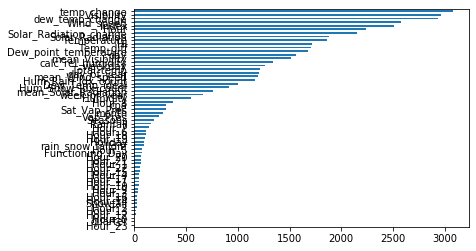

In [165]:
predicted = func(lgb.LGBMRegressor(n_estimators=1500,random_state=seed),train,label,test,5,seed)

In [166]:
predicted.head()

,0,1,2,3,4
0,898.887924,800.037627,699.429720,807.223513,886.211015
1,752.195152,618.704278,653.627718,703.227386,807.627132
2,499.190566,444.026549,469.507557,440.731010,516.869471
3,201.697925,244.488915,263.944895,111.326606,227.233414
4,322.705413,199.139613,245.163882,173.203053,178.284249


In [167]:
#ans = (predicted[1]+predicted[2]+predicted[4])/3

In [168]:
ans = np.mean(predicted,axis=1)

In [169]:
ans.head()

0    818.357960
1    707.076333
2    474.065031
3    209.738351
4    223.699242
dtype: float64

In [170]:
final = ans.astype('int')

In [171]:
sample = pd.DataFrame(np.zeros(shape=(test.shape[0],2)),columns=['Index','Rented Bike Count'])
sample['Rented Bike Count'] = final
sample.Index = idx

In [172]:
sample['Rented Bike Count'] = sample['Rented Bike Count'].apply(lambda x: x if x>=0 else 0)

In [173]:
sample.shape

(1728, 2)

In [174]:
sample.head()

,Index,Rented Bike Count
0,0,818
1,1,707
2,2,474
3,3,209
4,4,223


In [175]:
sample.to_csv('predict18.csv',index=False)